<a href="https://colab.research.google.com/github/surabhipandey18/FoodAgri/blob/main/foodagri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [7]:
path = '/content/drive/MyDrive/Hackathon/PlantVillage'

In [8]:
training_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = training_generator.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = training_generator.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 8842 images belonging to 15 classes.
Found 2206 images belonging to 15 classes.


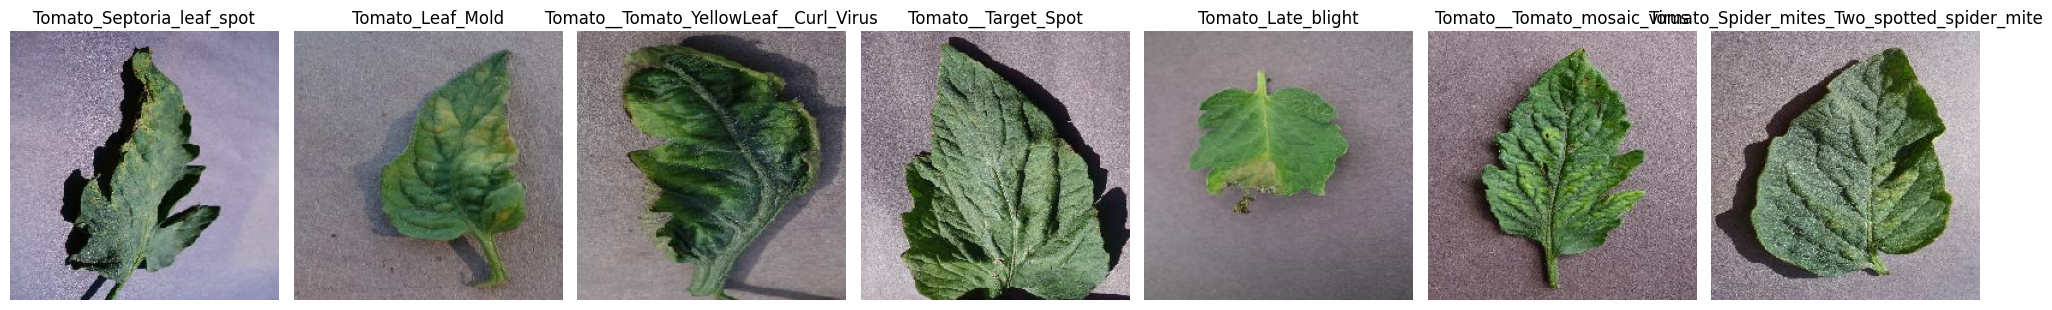

In [9]:
images, labels = next(train_generator)

class_name = train_generator.class_indices

index_to_class_name = {v: k for k, v in class_name.items()}

images_per_class = {}

fig_size = (20, 20)
for i in range(images.shape[0]):
    pred_class_index = labels[i].argmax()
    pred_class = index_to_class_name[pred_class_index]
    if pred_class not in images_per_class:
        images_per_class[pred_class] = images[i]
    if len(images_per_class[pred_class]) == len(class_name):
      break

plt.figure(figsize=fig_size)
i = 1
for class_name, image in images_per_class.items():
    plt.subplot(1, len(images_per_class), i)
    plt.imshow(image)
    plt.title(class_name)
    plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()


In [10]:
#CNN model training
recognition_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model_compile = recognition_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
recognition_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │     1,297,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,391,183 (5.31 MB)

 Trainable params: 1,391,183 (5.31 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
device = tf.device('/device:GPU:0')
with device:
  history = recognition_model.fit(
    train_generator, epochs = 10, validation_data = validation_generator)

Epoch 1/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 48s 174ms/step - accuracy: 0.9869 - loss: 0.0348 - val_accuracy: 0.9170 - val_loss: 0.3466
Epoch 2/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 49s 177ms/step - accuracy: 0.9811 - loss: 0.0607 - val_accuracy: 0.9238 - val_loss: 0.3190
Epoch 3/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 50s 179ms/step - accuracy: 0.9938 - loss: 0.0221 - val_accuracy: 0.9084 - val_loss: 0.4243
Epoch 4/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 80s 171ms/step - accuracy: 0.9832 - loss: 0.0506 - val_accuracy: 0.9266 - val_loss: 0.3610
Epoch 5/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 81s 169ms/step - accuracy: 0.9861 - loss: 0.0471 - val_accuracy: 0.9393 - val_loss: 0.3327
Epoch 6/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 48s 174ms/step - accuracy: 0.9824 - loss: 0.0494 - val_accuracy: 0.9198 - val_loss: 0.3412
Epoch 7/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 46s 168ms/step - accuracy: 0.9886 - loss: 0.0347 - val_accuracy: 0.9383 - val_loss: 0.3552
Epoch 8/10
277/277 ━━━━━━━━━━━━━━━━━━━━ 49s 176ms/step - accuracy: 0.9823 - loss: 0

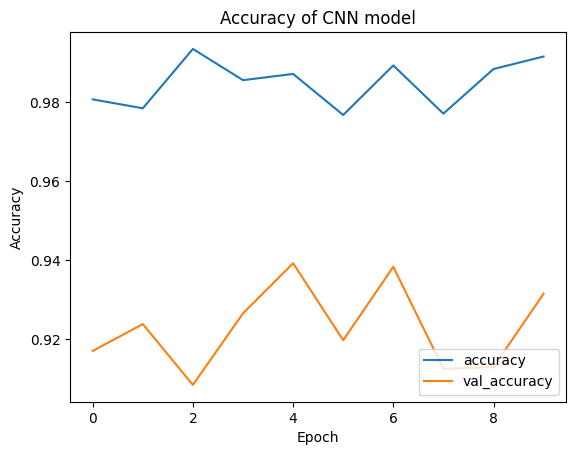

In [42]:
#accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Accuracy of CNN model")
plt.show()

69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step


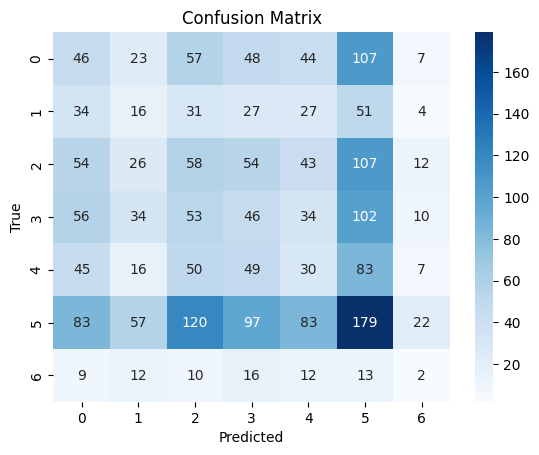

In [45]:
#plot confusion matrix
y_pred = recognition_model.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
#save recognition model
recognition_model.save('recognition_model.keras')